In [49]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Afficher/cacher le code</button>''', raw=True)

Afficher/cacher le code

In [5]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as pylab
import numpy as np
import pandas as pd
from sklearn import linear_model

# Génération des données
Pour cet exemple, on génère aléatoirement 20 états de circulation caractérisés par la densité et la vitesse moyenne. Les données sont présentées sous forme de tableau ci-dessous. 

In [22]:
kj = 150.
vmax = 100.
greenshieldV = lambda k: vmax*(1-k/kj)
densities = np.random.random_sample(20)*kj
speeds = [greenshieldV(k)*(1+0.15*np.random.randn()) for k in densities]
volumes = [k*v for k,v in zip(densities, speeds)]
print(pd.DataFrame({'densite (veh/km)': densities, 'vitesse {km/h}': speeds, 'debit (veh/h)': volumes}))

    debit (veh/h)  densite (veh/km)  vitesse {km/h}
0     3991.580094         52.503427       76.025135
1     4615.625484         75.817296       60.878266
2     2978.160642         89.047431       33.444655
3     3353.346365         53.670748       62.479963
4     4005.754661         73.112493       54.788922
5     3739.091618         98.089442       38.119206
6     2663.373306         37.965852       70.151812
7      371.984439          4.388896       84.755814
8     1758.391393         20.078348       87.576498
9     1207.490117        133.325915        9.056680
10    1045.490490        139.748983        7.481203
11     945.317788         13.442487       70.323130
12    3798.856495        110.023863       34.527569
13     353.344129          3.830284       92.250114
14    3692.637239        100.577515       36.714341
15     581.236198          5.819225       99.882071
16    3728.428032         82.246436       45.332396
17    2287.906376         29.286290       78.122098
18    3587.1

# Régression linéaire
On estime le modèle linéaire de Greenshields pour la relation de la vitesse moyenne en fonction de la densité par régression linéaire (estimateur des moindres carrés). 

In [45]:
regr = linear_model.LinearRegression()
regr.fit(np.array(densities).reshape(-1,1), np.array(speeds))
a = regr.coef_[0]
b = regr.intercept_
linearModel = lambda k: a*k+b
print('Modèle: v = {} k + {}'.format(a, b))
print('Vitesse libre: {}'.format(b))
print('Densité de congestion: {}'.format(-b/a))

Modèle: v = -0.593663289038 k + 94.7664457668
Vitesse libre: 94.7664457668
Densité de congestion: 159.629957784


# Relations bi-variées
Pour chacune des trois relations bivariées de la vitesse moyenne en fonction de la densité, le débit en fonction de la densité et la vitesse moyenne en fonction du débit, on représente les données et les prédictions du modèle de Greenshields. 

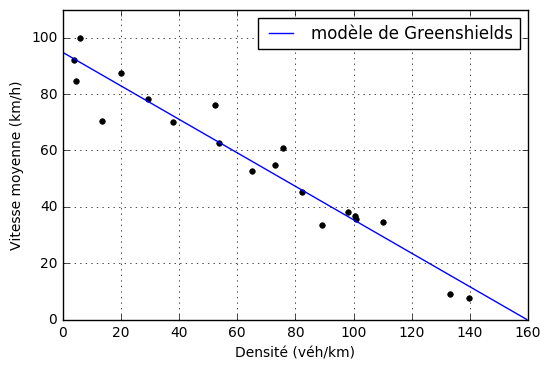

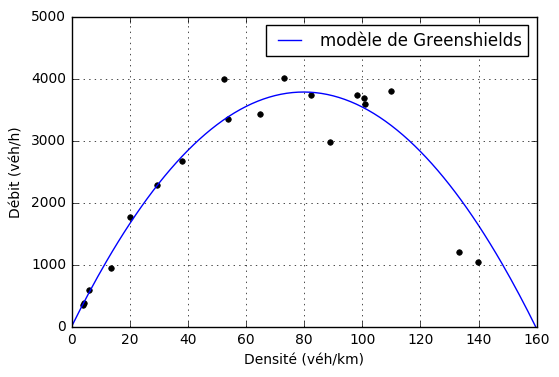

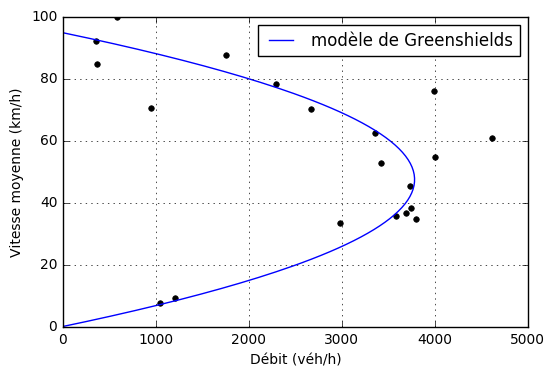

In [48]:
# v=f(k)
plt.figure()
plt.plot(densities, speeds, 'ok', markersize = 4)
plt.plot([0, -b/a], [linearModel(0), linearModel(-b/a)], label = u'modèle de Greenshields')
plt.xlabel(u'Densité (véh/km)')
plt.ylabel('Vitesse moyenne (km/h)')
#plt.xlim(0,-b/a+10)
plt.ylim(0,vmax+10)
plt.grid()
plt.legend()
# q=f(k)
plt.figure()
plt.plot(densities, volumes, 'ok', markersize = 4)
plt.plot(np.arange(-b/a+1), [linearModel(k)*k for k in np.arange(-b/a+1)], label = u'modèle de Greenshields')
plt.xlabel(u'Densité (véh/km)')
plt.ylabel(u'Débit (véh/h)')
#plt.xlim(0,-b/a+10)
plt.ylim(ymin=0)#,max(volumes)+500)
plt.grid()
plt.legend()
# q=f(k)
plt.figure()
plt.plot(volumes, speeds, 'ok', markersize = 4)
plt.plot([linearModel(k)*k for k in np.arange(-b/a+1)], [linearModel(k) for k in np.arange(-b/a+1)], label = u'modèle de Greenshields')
plt.ylabel(u'Vitesse moyenne (km/h)')
plt.xlabel(u'Débit (véh/h)')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid()
plt.legend()
